# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Anjana Dhakal, 11/18/2024
GitHub: https://github.com/anjana-codes/webmin_06_project


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1. 
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [70]:
import requests
import pickle

# URL of the web page to scrape
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Make a request to fetch the HTML content
response = requests.get(url)
article_html = response.text

# Save the HTML content to a .pkl file
with open("article.pkl", "wb") as file:
    pickle.dump(article_html, file)
print( "Article HTML saved to article.pkl ")

Article HTML saved to article.pkl 


### Question 2.
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [71]:

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")


# Extract the main content by looking for specific tags or attributes

main_content = soup.find("article")  # Example for <article> tag


# If main_content is found, get its text
if main_content:
    article_text = main_content.get_text() 
else:
    article_text = soup.get_text()  

# Print the filtered main content
print(article_text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Question 3.
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [72]:
import spacy
from collections import Counter

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the text through the spaCy pipeline
doc = nlp(article_text)

# Filter tokens: exclude punctuation, stopwords, and whitespace
filtered_tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequency of each token
token_freq = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print the common tokons and their frequencies 
print("Most common filtered_tokens and their Frequency:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


Most common filtered_tokens and their Frequency:
Token: 'laser', Frequency: 35
Token: 'headlights', Frequency: 19
Token: 'headlight', Frequency: 11
Token: 'technology', Frequency: 10
Token: 'led', Frequency: 10


### Question 4. 
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [73]:
import spacy
from collections import Counter

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the text through the spaCy pipeline
doc = nlp(article_text)

# Filter lemmas: exclude punctuation, stopwords, and whitespace
filtered_lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequency of each lemma
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("Most common Lemma and their frequency:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Most common Lemma and their frequency:
Lemma: 'laser', Frequency: 40
Lemma: 'headlight', Frequency: 28
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


### Question 5. 
Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [74]:
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the frequency of interesting tokens.
    
    Args:
        sentence (spacy.tokens.Span): The sentence to score.
        interesting_tokens (list): A list of interesting tokens to check against.
    
    Returns:
        float: The score of the sentence.
    """
    tokens = [token.text.lower() for token in sentence if not token.is_punct and not token.is_space]
    num_interesting = sum(1 for token in tokens if token in interesting_tokens)
    return num_interesting / len(tokens) if tokens else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence based on the frequency of interesting lemmas.
    
    Args:
        sentence (spacy.tokens.Span): The sentence to score.
        interesting_lemmas (list): A list of interesting lemmas to check against.
    
    Returns:
        float: The score of the sentence.
    """
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_space]
    num_interesting = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return num_interesting / len(lemmas) if lemmas else 0

# Test the functions with the article text
# Load the spaCy pipeline and process the article text
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Get the most frequent tokens and lemmas from the earlier analysis
# Simulating the frequent tokens and lemmas from Questions 3 and 4 for testing
frequent_tokens = ["laser", "headlights", "light", "work", "technology"]
frequent_lemmas = ["laser", "headlight", "light", "work", "technology"]

# Get the first sentence in the article
first_sentence = list(doc.sents)[0]

# Calculate scores for the first sentence
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)

# Print the results
print(f"First Sentence: {first_sentence.text}\n")
print(f"Token Score:{token_score}")
print(f"Lemma Score: {lemma_score}")


First Sentence: 

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Token Score:0.15151515151515152
Lemma Score: 0.12121212121212122


### Question 6. 
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

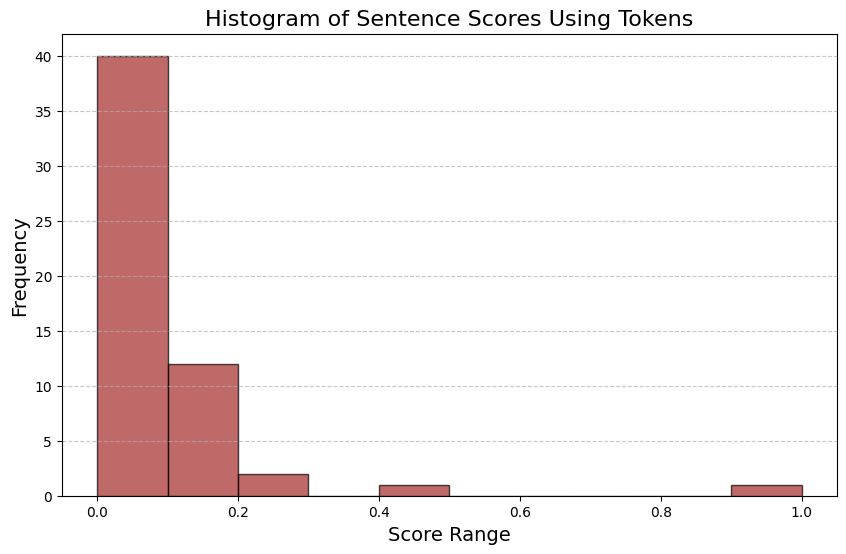

In [75]:
import matplotlib.pyplot as plt

# Calculate scores for every sentence in the article
sentence_scores = [
    score_sentence_by_token(sentence, frequent_tokens) for sentence in doc.sents
]

# Plot a histogram of the scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, color='brown', edgecolor='black', alpha=0.7)
plt.title("Histogram of Sentence Scores Using Tokens", fontsize=16)
plt.xlabel("Score Range", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment: The most common range of scores appears to be 0-0.1.


### Question 7. 
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

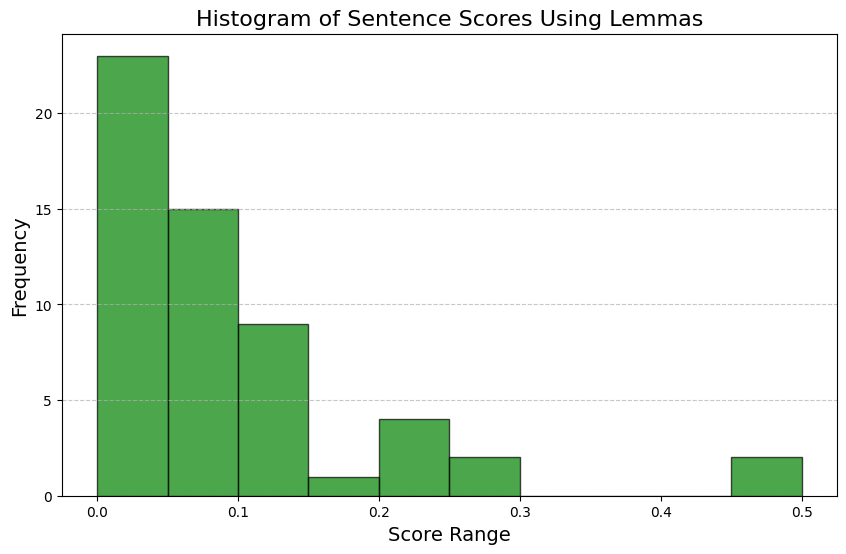

In [76]:
# Calculate scores for every sentence in the article using lemmas
lemma_scores = [
    score_sentence_by_lemma(sentence, frequent_lemmas) for sentence in doc.sents
]

# Plot a histogram of the lemma scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=10, color='green', edgecolor='black', alpha=0.7)
plt.title("Histogram of Sentence Scores Using Lemmas", fontsize=16)
plt.xlabel("Score Range", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment: The most common range of scores appears to be 0-0.1.


### Question 8. 
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

To consider only nouns when generating the lists of interesting tokens and lemmas, we can modify the filtering step in both score_sentence_by_token() and score_sentence_by_lemma() methods by checking the part-of-speech (POS) of each token.

 For Tokens, 

filtered_tokens = [
    token.text.lower()
    for token in doc
    if token.pos_ in ['NOUN', 'PROPN'] and not token.is_stop and not token.is_punct and not token.is_space
]

 For Lemmas, 
 
filtered_lemmas = [
    token.lemma_.lower()
    for token in doc
    if token.pos_ in ['NOUN', 'PROPN'] and not token.is_stop and not token.is_punct and not token.is_space
]
